In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
module_path = os.path.abspath(os.path.join('..', 'demand_acep'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from demand_acep import extract_data
from demand_acep import data_impute
from demand_acep import data_resample

In [4]:
dirpath = os.path.join(module_path, 'data/measurements/test_data')
filename = 'PokerFlatResearchRange-PokerFlat-PkFltM3SciPTot@2019-01-03T093004Z@P1D@PT179F.nc'

In [5]:
test_df = extract_data(dirpath, filename)
sample_time = '1S' # 1 second sampling time
test_resampled = data_resample(test_df, sample_time)
test_resampled.set_index(np.arange(1, len(test_resampled)+1), inplace=True)

/Users/Tinu/miniconda3/envs/acep/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.


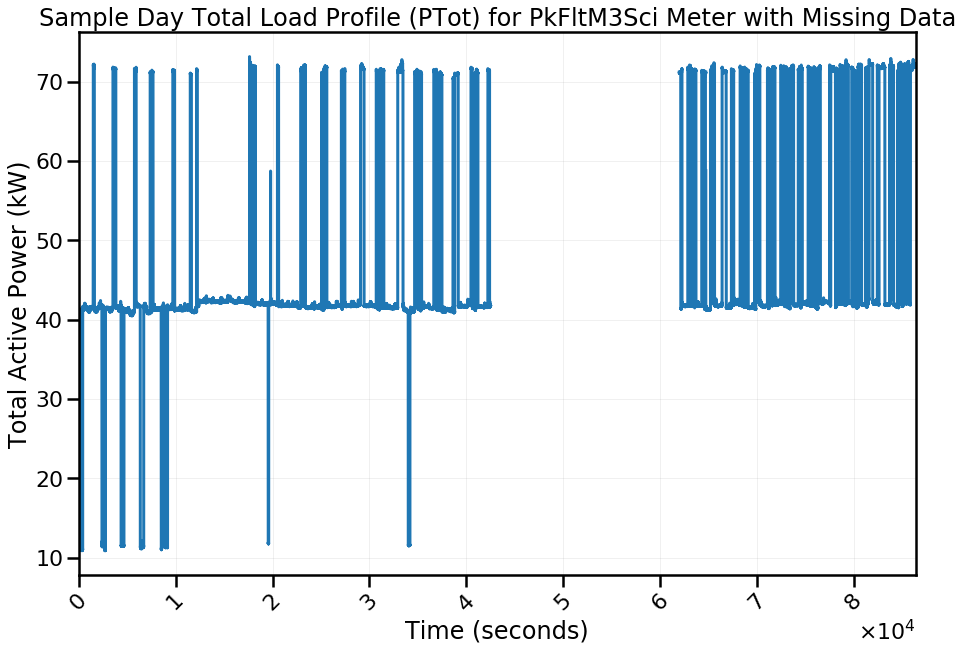

In [6]:
sns.set_context('poster')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.sca(ax)
plt.plot(test_resampled)
plt.title('Sample Day Total Load Profile (PTot) for PkFltM3Sci Meter with Missing Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Active Power (kW)')
plt.grid(linewidth=0.75, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.major.formatter._useMathText = True
plt.show()

In [10]:
test_filled = data_impute(test_resampled)

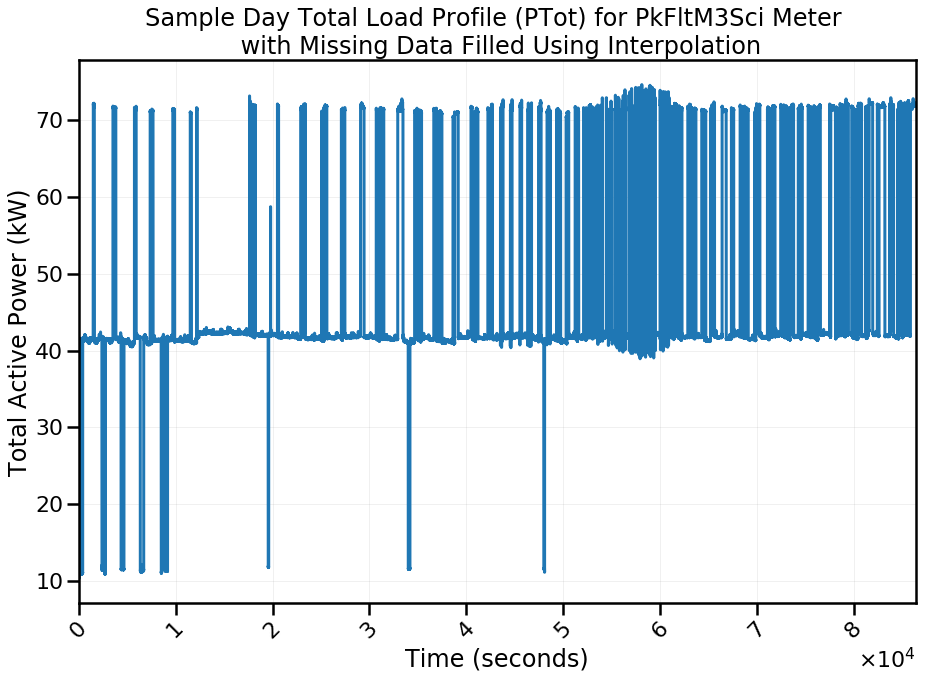

In [11]:
sns.set_context('poster')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.sca(ax)
plt.plot(test_filled)
plt.title('Sample Day Total Load Profile (PTot) for PkFltM3Sci Meter \n with Missing Data Filled Using Interpolation')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Active Power (kW)')
plt.grid(linewidth=0.75, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.major.formatter._useMathText = True
plt.show()